In [1]:
import pandas as pd
import numpy as np
import datetime 
import math
from matplotlib import pyplot as plt

In [2]:
%cd ..

c:\Users\Frank\OneDrive\Documents\git\delta_test_bnc


In [3]:
%reload_ext autoreload
%autoreload 2

In [4]:
from bnc_tms import tms

In [5]:
#Dummy dates
ndays = int(60 * 7/5)
base = datetime.date.today()
dates = [base - datetime.timedelta(days = n) for n in range(ndays)]
dates = np.array([x for x in dates if x.weekday() not in [5,6]])

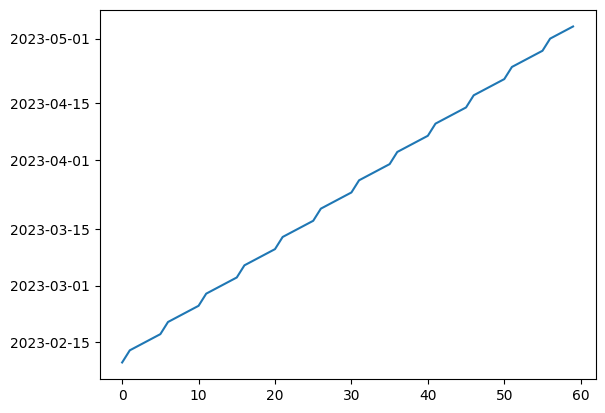

In [6]:
plt.plot(np.flip(dates))

In [7]:
#Dummy volume
vol = 10000
nrows = vol + np.array([int(vol * (2 + math.sin(i * 2*math.pi/5))) for i in range(ndays)])

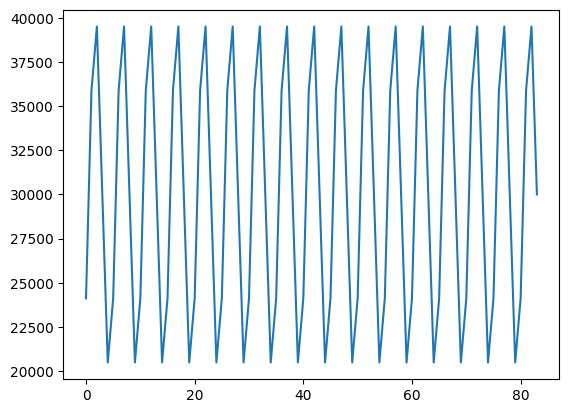

In [8]:
plt.plot(np.flip(nrows))

In [9]:
#Frame
rows = [[dt, v] for dt,v in zip(dates, nrows)]
df = pd.DataFrame(rows, columns = ["Date", "Rows"])

In [10]:
tms_model = tms.timeseries_model(df)

------ DELTA TIMESERIES TEST RESULT ------
Model r-squared: 0.0
Correlation between residuals and fitted values: nan
Baseline: 29999
Daily trend: 0
Y lagged term: 0.0
Lag (days): 7.0
*****
Symmetric MAPE+1 residuals distribution: {'type': 'Gamma', 'shape': 0.1557, 'scale': 146.731}
Observed volume: 30000
Expected volume: 29999
p-value: 0.9874
Test alpha: 0.05
Result: PASS
------------------------------------------


c:\Users\Frank\OneDrive\Documents\git\delta_test_bnc\venv\lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


In [11]:
#Dummy volume
vol = 10000
nrows = np.array([int(vol * (2 + math.sin(i * 2*math.pi/5))) for i in range(ndays)])

sdev = int(vol/5)
nrows = nrows + np.array([int(np.random.normal(0, sdev)) for n in range(ndays)])
nrows = vol + nrows - min(nrows)

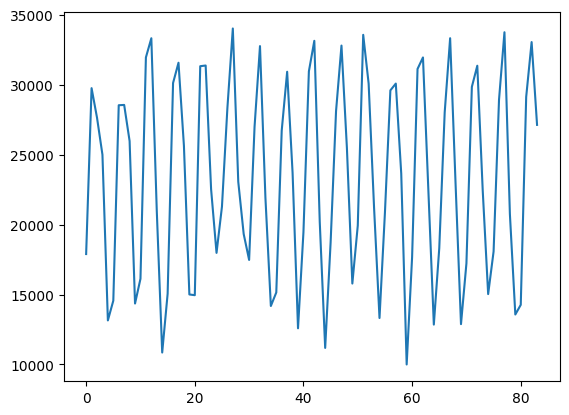

In [12]:
plt.plot(np.flip(nrows))

In [13]:
#Frame
rows = [[dt, v] for dt,v in zip(dates, nrows)]
df = pd.DataFrame(rows, columns = ["Date", "Rows"])

In [14]:
tms_model = tms.timeseries_model(df, use_empirical_residuals_pdf=True, alpha=0.025)

------ DELTA TIMESERIES TEST RESULT ------
Model r-squared: 0.42
Correlation between residuals and fitted values: -0.22
Baseline: 23127
Daily trend: -185
Y lagged term: 0.3454
Lag (days): 7.0
*****
Symmetric MAPE+1 residuals distribution: {'type': 'Gamma', 'shape': 0.1467, 'scale': 176.5264}
Observed volume: 27132
Expected volume: 14946
p-value: 0.2975
Test alpha: 0.025
Result: PASS
------------------------------------------


In [15]:
#Dummy volume
vol = 10000
sdev = int(vol/300)
nrows = vol + np.array([int(np.random.normal(0, sdev)) for n in range(ndays)])

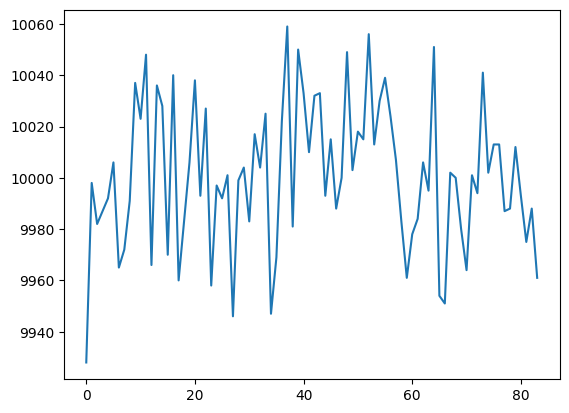

In [16]:
plt.plot(np.flip(nrows))

In [17]:
#Frame
rows = [[dt, v] for dt,v in zip(dates, nrows)]
df = pd.DataFrame(rows, columns = ["Date", "Rows"])

In [18]:
tms_model = tms.timeseries_model(df)

------ DELTA TIMESERIES TEST RESULT ------
Model r-squared: 0.0
Correlation between residuals and fitted values: 0.06
Baseline: 10002
Daily trend: 0
Y lagged term: 0.0003
Lag (days): 1.0
*****
Symmetric MAPE+1 residuals distribution: {'type': 'Gamma', 'shape': 2.5101, 'scale': 0.4657}
Observed volume: 9961
Expected volume: 9999
p-value: 0.6266
Test alpha: 0.05
Result: PASS
------------------------------------------


In [19]:
#Dummy volume
vol = 10000
sdev = int(vol/20)
nrows = vol + np.array([int(np.random.normal(0, sdev)) for n in range(ndays)])
nrows = nrows - 100 * np.array([i for i in range(len(nrows))])

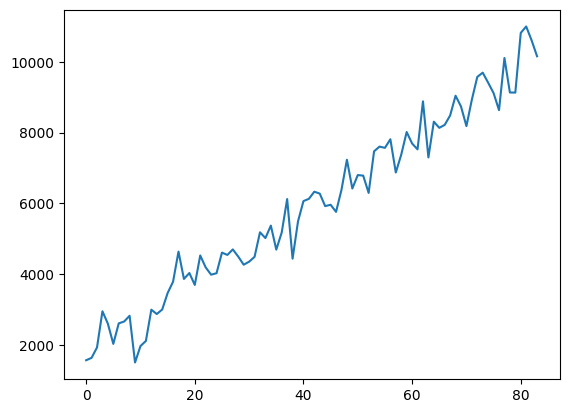

In [20]:
plt.plot(np.flip(nrows))

In [21]:
#Frame
rows = [[dt, v] for dt,v in zip(dates, nrows)]
df = pd.DataFrame(rows, columns = ["Date", "Rows"])

In [22]:
tms_model = tms.timeseries_model(df)

------ DELTA TIMESERIES TEST RESULT ------
Model r-squared: 0.69
Correlation between residuals and fitted values: 0.29
Baseline: 7150
Daily trend: 116
Y lagged term: -0.7066
Lag (days): 1.0
*****
Symmetric MAPE+1 residuals distribution: {'type': 'Gamma', 'shape': 0.2277, 'scale': 35.3459}
Observed volume: 10156
Expected volume: 9322
p-value: 0.4569
Test alpha: 0.05
Result: PASS
------------------------------------------
